Feature 0: 0.038147


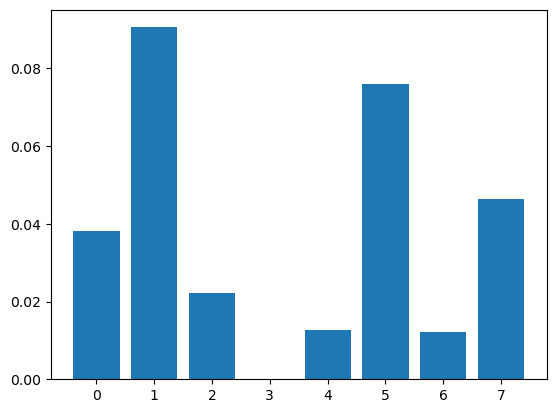

Feature 1: 0.090573


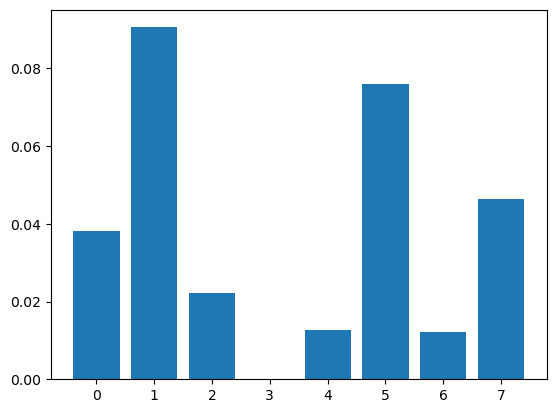

Feature 2: 0.022252


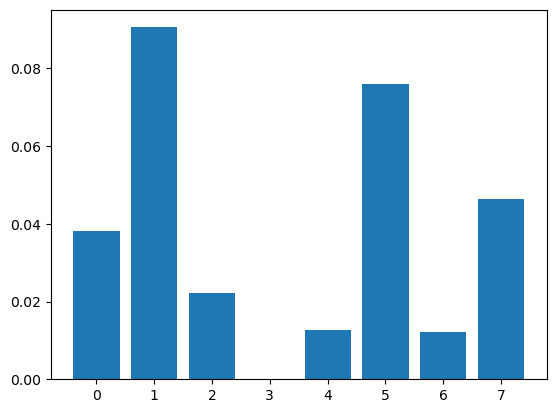

Feature 3: 0.000000


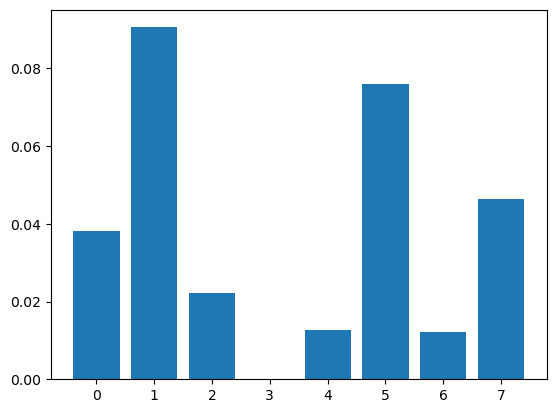

Feature 4: 0.012551


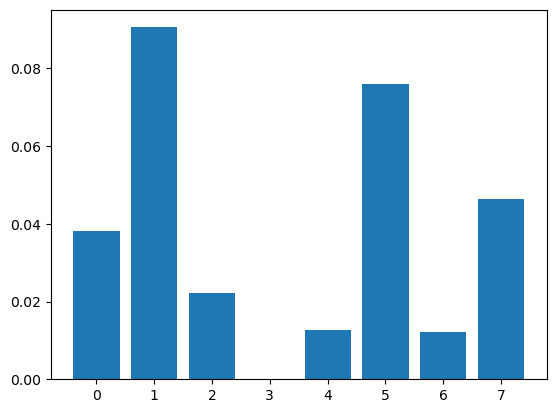

Feature 5: 0.075946


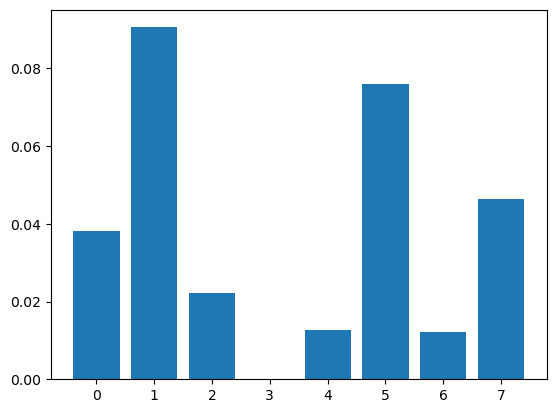

Feature 6: 0.012178


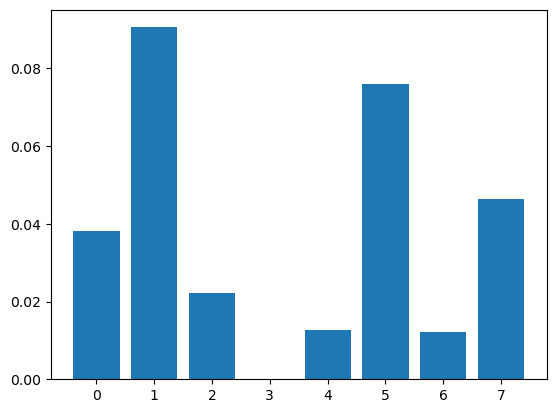

Feature 7: 0.046470


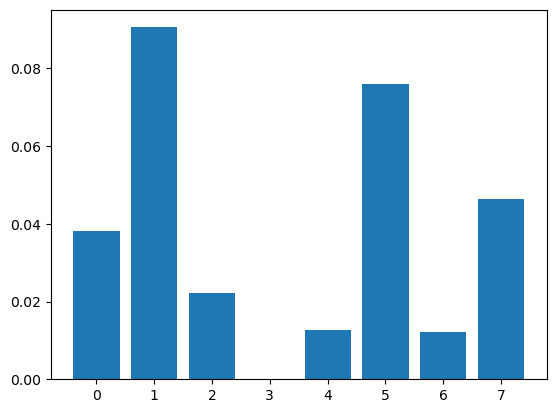

Accuracy: 77.56


In [24]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def load_dataset(filename):
    data = read_csv(filename, header=None)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


X, y = load_dataset('pima-indians-diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.show()
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [26]:
##using ANOVA F-test statistic
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 77.56
